# problem 1

### 1.	Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3 principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering on the principal components dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and check if you’re getting similar results with and without PCA).

Data: 
   The data consist of wine which has the incredents added to it.

Data Dictionary:
- Dataset contains 3 types of wine
- we take 178 data of wines
- 13 features are recorded for each tyoe of wine

Description:
- Alcohol - % of Alcohol added  in wine
- Malic - Malic acid is a tart-tasting compound 
- Ash - % of inorganic matter that remains after evaporation and incineration
- Alcalinity - % of Alcalinity in wine
- Magnesium - Average amount of Magnesium added in  wine in int
- Phenols - % of Phenolic content in wine
- Flavanoids - % of polyphenolic compounds added to wine
- Nonflavanoids - % of hydroxycinamic acids added to wine
- Proanthocyanins -% of poly phenosn  added to wine
- Color - % of color added to wine
- Hue - % of warmth added to color
- Dilution -% of diluted wine
- Proline - proline is an amino acid in "integer"


In [3]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#setting present working directory
import os
os.chdir(r"D:\360 Data Science 360DigiTMG\Day14-Datasets_PCA_Problem Statement")

In [6]:
#reading the data into python
wine = pd.read_csv('wine.csv')

In [7]:
#display the data
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
#shape of the data
wine.shape

(178, 14)

In [9]:
#information about the data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [10]:
#data preprocessing
#eda or statistical anlysis
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
wine1=wine.drop(['Type'],axis=1)

In [12]:
#checking null values
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [13]:
#hence there is no null values 
#we can see is there any duplicates in the data
dup = wine.duplicated()
sum(dup)

0

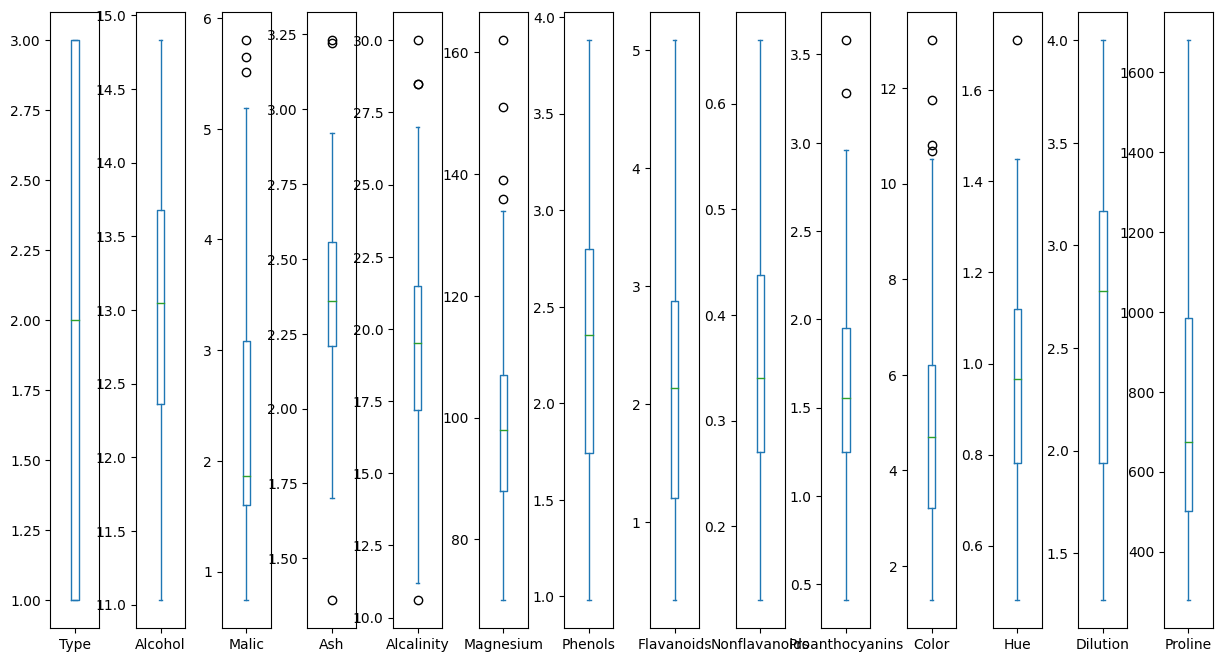

In [14]:
#check any outlier is present in the data
wine.plot(kind='box',subplots=True, sharey=False,figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [15]:
#to treat the  outlier

from feature_engine.outliers import Winsorizer

In [16]:
winsor = Winsorizer(capping_method='iqr',tail='both',fold=1.5,
                    variables=['Malic','Ash','Alcalinity','Magnesium','Proanthocyanins','Color','Hue'])

In [16]:
wine = winsor.fit_transform(wine)

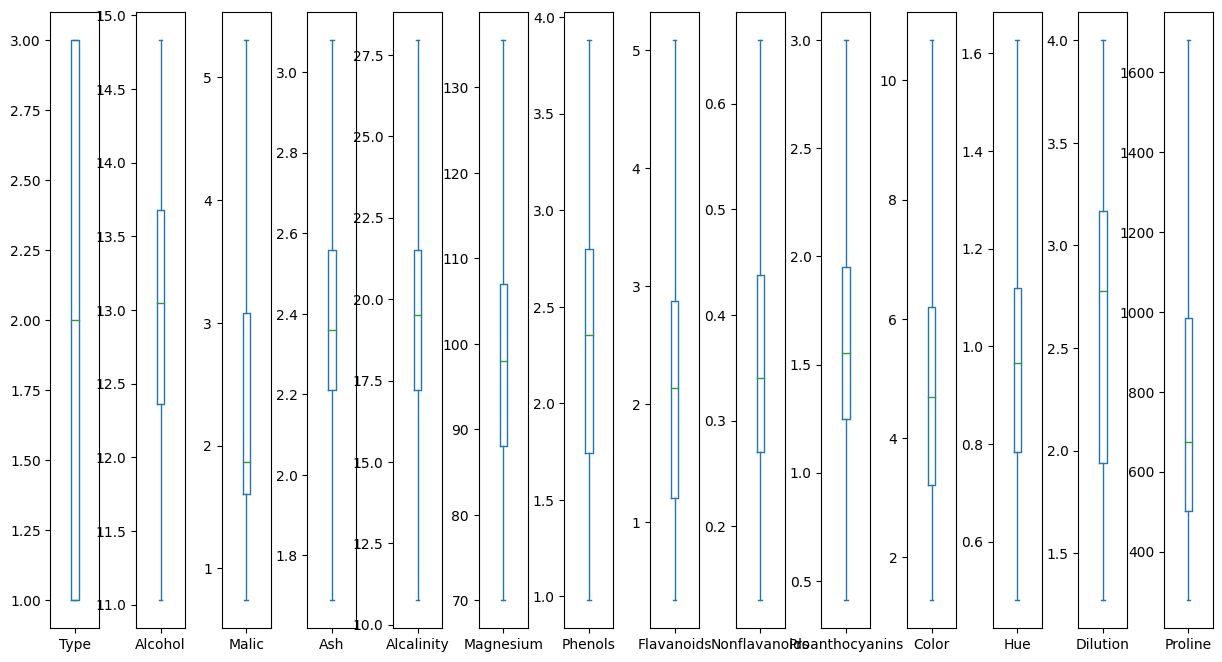

In [17]:
#check the outlier  after treatment does any present in the data
wine.plot(kind='box',subplots=True, sharey=False,figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [18]:
#Data has to be standardized to address the scale difference
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [22]:
#normalization function
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [23]:
# Normalizing the numerical data 
df_norm = norm_func(wine.iloc[:, 1:])

In [24]:
df_norm.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.348589,0.487749,0.507447,0.450124,0.453487,0.356386,0.437460,0.454080,0.400229,0.416121,0.491460,0.334446
std,0.213639,0.241134,0.189716,0.191149,0.204797,0.215811,0.210730,0.234818,0.215503,0.240775,0.198120,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.189041,0.375000,0.375000,0.274809,0.262931,0.182489,0.264151,0.324324,0.206603,0.263904,0.244505,0.158702
50%,0.531579,0.246575,0.482914,0.508721,0.427481,0.474138,0.378692,0.396226,0.442085,0.363152,0.423119,0.553114,0.282097
75%,0.696711,0.513425,0.625000,0.625000,0.564885,0.627586,0.534810,0.580189,0.594595,0.523962,0.558342,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [26]:
pca_values = pca.fit_transform(df_norm)

In [28]:
var = pca.explained_variance_ratio_
var

array([0.37752763, 0.20073531, 0.0911699 ])

In [29]:
pca.components_

array([[-0.11809111,  0.27441585,  0.00740308,  0.19677258, -0.11521284,
        -0.37717581, -0.39813   ,  0.31827093, -0.30210379,  0.11973681,
        -0.26700973, -0.45522721, -0.26927141],
       [-0.47654949, -0.21850037, -0.22884368,  0.05927605, -0.28783769,
        -0.08663385, -0.02329605,  0.00711639, -0.05843024, -0.58239814,
         0.22129809,  0.17365029, -0.39572317],
       [-0.13960398,  0.34063073,  0.55601457,  0.53843272,  0.09969535,
         0.18878162,  0.16122338,  0.2385967 ,  0.2083332 , -0.12187429,
        -0.01763401,  0.24625245, -0.1330906 ]])

In [30]:
pca.components_[0]

array([-0.11809111,  0.27441585,  0.00740308,  0.19677258, -0.11521284,
       -0.37717581, -0.39813   ,  0.31827093, -0.30210379,  0.11973681,
       -0.26700973, -0.45522721, -0.26927141])

In [31]:
# Cumulative variance 
var1 = np.cumsum(pca.explained_variance_ratio_)
var1

array([0.37752763, 0.57826294, 0.66943284])

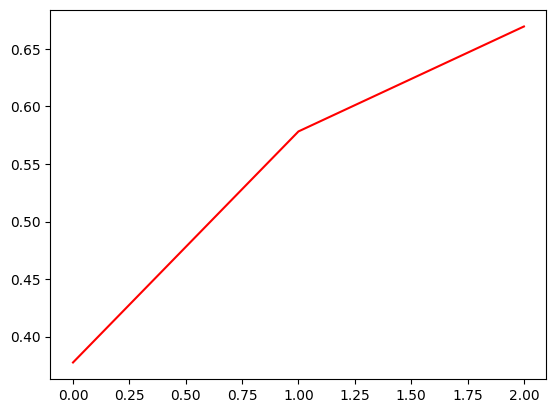

In [33]:
plt.plot(var1, color ='red')

In [36]:
# PCA scores
pca_values

array([[-7.42378094e-01, -3.34163295e-01,  2.07339235e-02],
       [-4.88848026e-01,  2.25957240e-02, -3.70532896e-01],
       [-5.47607153e-01, -2.44359066e-01,  2.36458137e-01],
       [-8.09298310e-01, -6.56370395e-01,  2.68313656e-02],
       [-2.15145425e-01, -1.40491082e-01,  4.12441257e-01],
       [-6.15710481e-01, -5.22832038e-01, -1.06317422e-01],
       [-5.48821718e-01, -2.78329870e-01, -1.44173446e-01],
       [-4.64367356e-01, -3.43838562e-01,  3.82783702e-02],
       [-5.15935176e-01, -2.56812167e-01, -3.18963767e-01],
       [-6.20802055e-01, -2.33739369e-01, -1.87316748e-01],
       [-7.41607158e-01, -3.61243423e-01, -6.69674852e-02],
       [-3.76750846e-01, -1.75351040e-01, -2.88269621e-01],
       [-4.46768776e-01, -1.97989953e-01, -1.88173791e-01],
       [-6.74656747e-01, -3.16053507e-01, -1.64362177e-01],
       [-8.73502083e-01, -5.66758554e-01, -1.88252167e-01],
       [-4.65044982e-01, -4.10420214e-01, -1.64111820e-02],
       [-4.36465104e-01, -5.17729507e-01

In [37]:
#pca for feature extraction
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2"
final = pd.concat([wine.Type, pca_data.iloc[:, 0:3]], axis = 1)

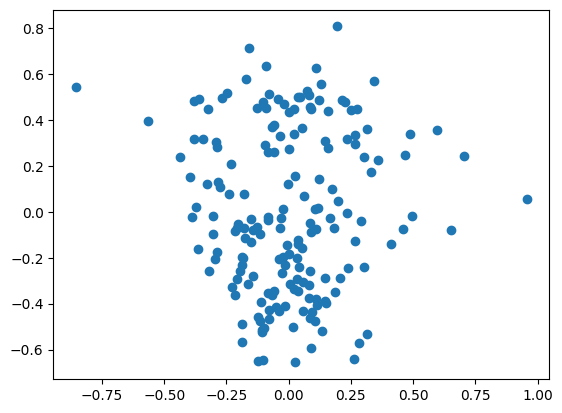

In [38]:
# Scatter diagram
plt.scatter(x = final.comp2, y = final.comp1)

<AxesSubplot: xlabel='comp1'>

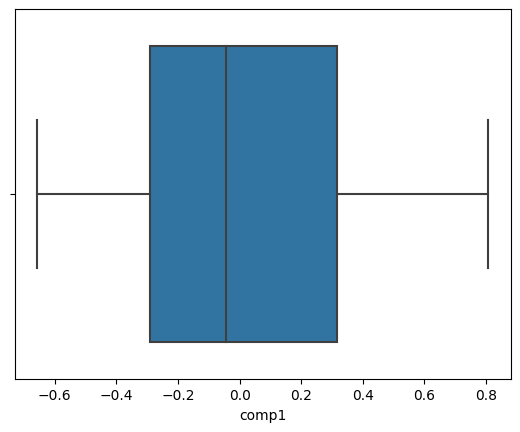

In [40]:
sns.boxplot(final.comp1)

<AxesSubplot: xlabel='comp2'>

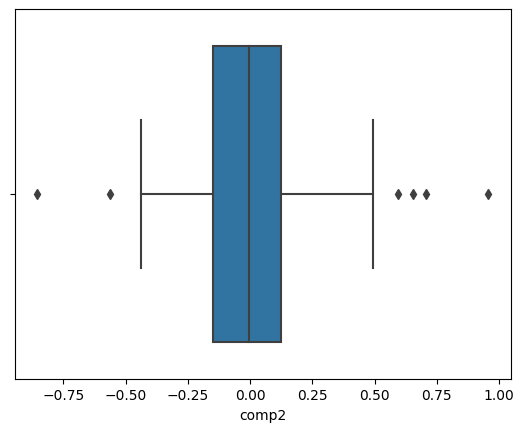

In [41]:
sns.boxplot(final.comp2)

<AxesSubplot: xlabel='comp0'>

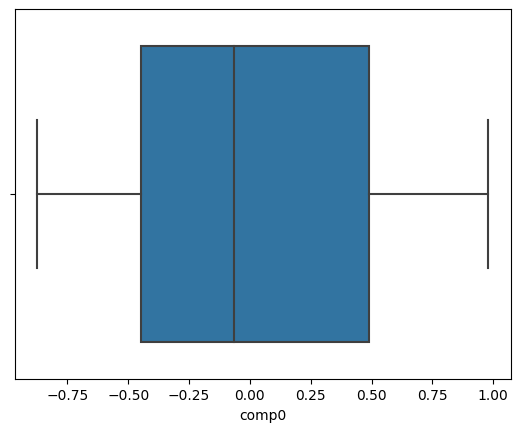

In [43]:
sns.boxplot(final.comp0)

In [45]:
winsor = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables='comp2')
final["comp2"] = winsor.fit_transform(final[["comp2"]])

<AxesSubplot: xlabel='comp2'>

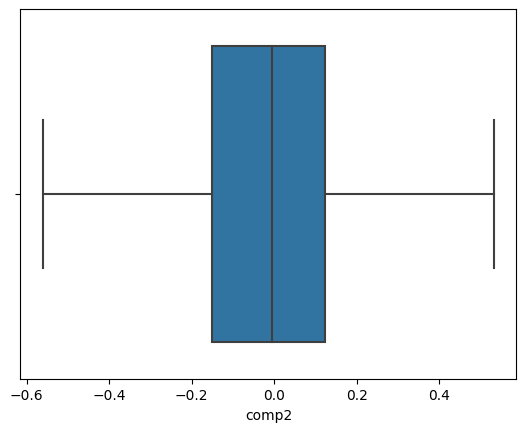

In [46]:
sns.boxplot(final.comp2)

In [52]:
#clustering model building
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering,KMeans

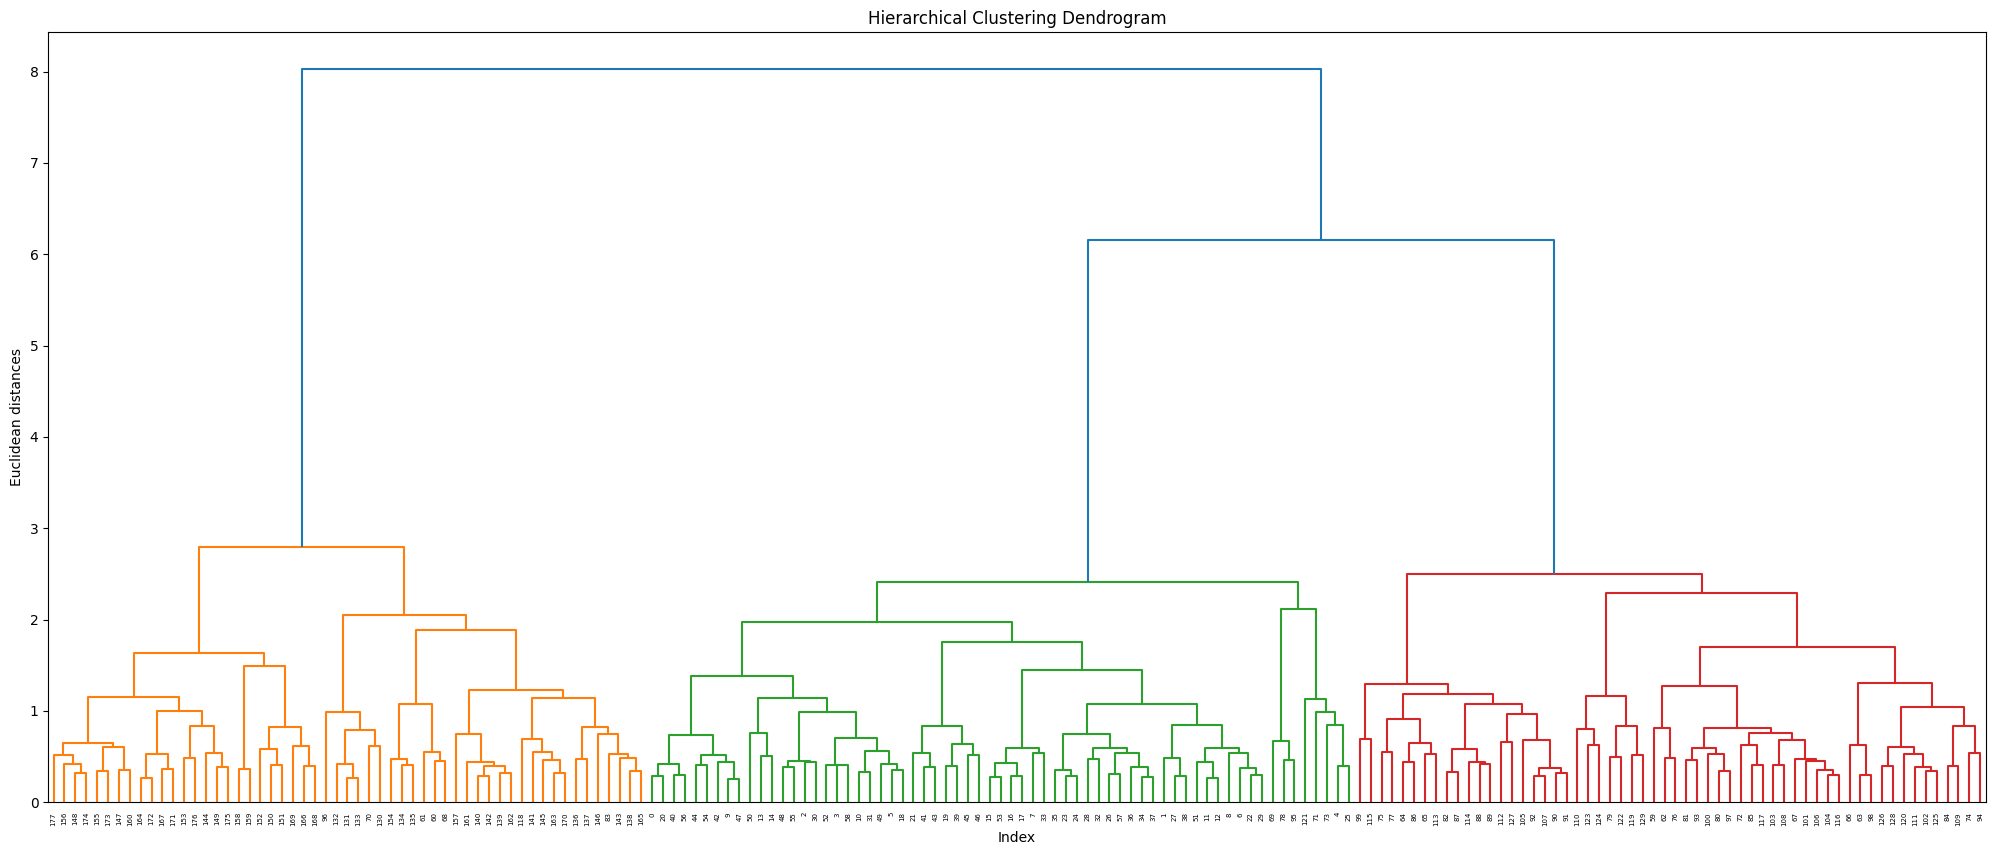

In [48]:
plt.figure(1, figsize = (25, 10))
tree_plot = dendrogram(linkage(df_norm, method  = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [53]:
#kmeans
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[77.451536075082,
 58.921471292501465,
 54.23063512042246,
 51.34791830175855,
 48.428364422833155,
 45.453049418712794,
 43.30787631174271]

Text(0, 0.5, 'total_within_SS')

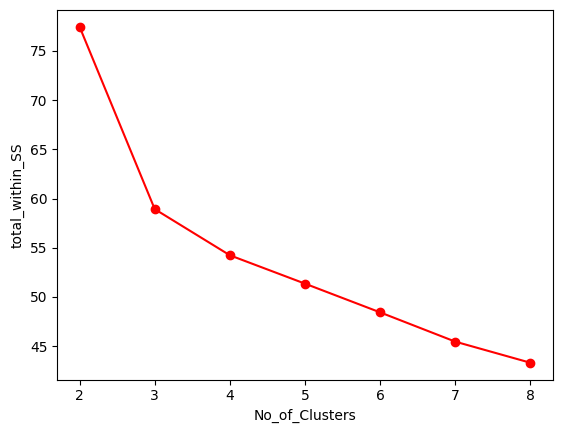

In [54]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [55]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(wine)

KMeans(n_clusters=3)

In [56]:
model.labels_ # getting the labels of clusters assigned to each row 


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [57]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [58]:
final['clust'] = mb # creating a  new column and assigning it to new column 

In [59]:
final = final.iloc[:,[4,0,1,2,3]]
final.head()

,clust,Type,comp0,comp1,comp2
0,1,1,-0.742378,-0.334163,0.020734
1,1,1,-0.488848,0.022596,-0.370533
2,1,1,-0.547607,-0.244359,0.236458
3,1,1,-0.809298,-0.656370,0.026831
4,1,1,-0.215145,-0.140491,0.412441


In [60]:
final['Type'].replace({1:0 ,2:2 ,3:1})

0      0
1      0
2      0
3      0
4      0
      ..
173    1
174    1
175    1
176    1
177    1
Name: Type, Length: 178, dtype: int64

# problem - 2

### 2.	A pharmaceuticals manufacturing company is conducting a study on a new medicine to treat heart diseases. The company has gathered data from its secondary sources and would like you to provide high level analytical insights on the data. Its aim is to segregate patients depending on their age group and other factors given in the data. Perform PCA and clustering algorithms on the dataset and check if the clusters formed before and after PCA are the same and provide a brief report on your model. You can also explore more ways to improve your model. 

In [50]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
#setting present working directory
import os
os.chdir(r"D:\360 Data Science 360DigiTMG\Day14-Datasets_PCA_Problem Statement")

In [53]:
#reading the data into python
df = pd.read_csv('heart disease.csv')

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
#shape of the data
df.shape

(303, 14)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [57]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [58]:
dup = df.duplicated()
sum(dup)

1

In [59]:
df=df.drop_duplicates()

In [60]:
dup = df.duplicated()
sum(dup)

0

In [61]:
df1=df.drop(['target'],axis=1)

In [62]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [63]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [64]:
#normalization function
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [65]:
df_norm = norm_func(df.iloc[:, 0:])

In [66]:
df_norm.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.529594,0.682119,0.321192,0.354742,0.275114,0.149007,0.263245,0.599767,0.327815,0.168233,0.698675,0.179636,0.771523,0.543046
std,0.188499,0.466426,0.344015,0.165692,0.118159,0.356686,0.263014,0.174836,0.470196,0.187331,0.308137,0.251687,0.204342,0.498970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.475191,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.552083,1.000000,0.333333,0.339623,0.261416,0.000000,0.500000,0.622137,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.433962,0.339612,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [69]:
pca_values = pca.fit_transform(df_norm)

In [70]:
# The amount of variance that each PCA explains is 

var = pca.explained_variance_ratio_
var

array([0.33130379, 0.15268579, 0.1056623 ])

In [71]:
pca.components_

array([[ 0.06003332,  0.30316929, -0.28854624,  0.03086914,  0.00942726,
         0.02691579, -0.0614701 , -0.13251352,  0.51740233,  0.13738978,
        -0.19866788,  0.15026087,  0.11633121, -0.66027227],
       [ 0.08134497, -0.90384181, -0.20539616,  0.03654845,  0.06204948,
        -0.07727139,  0.0104251 , -0.08364161,  0.30747847,  0.04969489,
        -0.12930667, -0.0036004 , -0.04275252, -0.02074741],
       [ 0.16816474, -0.19831984,  0.1892168 ,  0.12708162,  0.03315942,
         0.58843179, -0.13095093, -0.04002264, -0.51090893,  0.10510742,
        -0.21745804,  0.25129125,  0.00366437, -0.36305843]])

In [72]:
pca.components_[0]

array([ 0.06003332,  0.30316929, -0.28854624,  0.03086914,  0.00942726,
        0.02691579, -0.0614701 , -0.13251352,  0.51740233,  0.13738978,
       -0.19866788,  0.15026087,  0.11633121, -0.66027227])

In [73]:
#cummulative variance
var1 = np.cumsum(pca.explained_variance_ratio_)
var1

array([0.33130379, 0.48398958, 0.58965188])

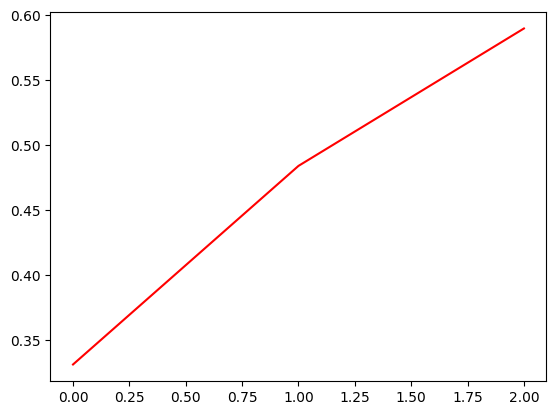

In [74]:
plt.plot(var1,color='red')

In [75]:
# PCA scores
pca_values

array([[-4.29138287e-01, -4.68746530e-01,  7.73666870e-01],
       [-3.99186312e-01, -3.92879137e-01, -4.08373963e-02],
       [-8.01455598e-01,  4.37916124e-01, -7.80593253e-02],
       [-5.31849486e-01, -4.42847598e-01, -3.10874155e-01],
       [-2.06902530e-01,  8.63323502e-01, -6.72906543e-01],
       [-3.47499754e-01, -2.77172253e-01, -2.39904479e-01],
       [-6.61508402e-01,  5.55517316e-01,  1.06133118e-01],
       [-5.20169558e-01, -4.76829529e-01, -3.61684475e-01],
       [-5.43457534e-01, -5.89114986e-01,  3.87180837e-01],
       [-5.97733989e-01, -4.99941467e-01, -1.98695684e-01],
       [-4.05208037e-01, -3.55751793e-01, -3.44468082e-01],
       [-9.11300009e-01,  4.08036002e-01, -6.08246748e-02],
       [-5.34397512e-01, -4.44146138e-01, -3.22390102e-01],
       [-1.36345750e-02, -1.76567418e-01, -4.79947745e-01],
       [-9.36865775e-01,  2.73789873e-01,  7.22307853e-01],
       [-8.01778194e-01,  4.63787675e-01,  5.66119404e-02],
       [-9.38119425e-01,  4.08070076e-01

In [76]:
#pca for feature extraction
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "pc0", "pc1", "pc2"
final = pca_data.iloc[:, 0:3]

<AxesSubplot: xlabel='pc0'>

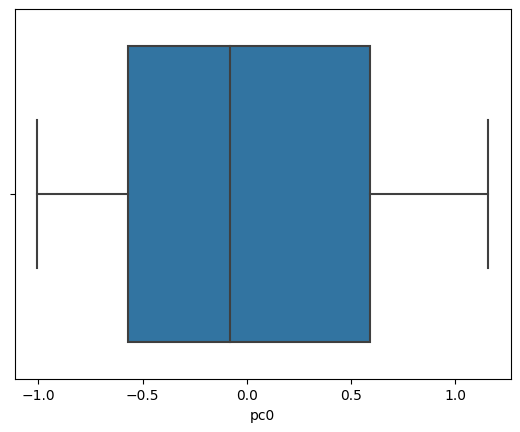

In [77]:
sns.boxplot(final.pc0)

<AxesSubplot: xlabel='pc1'>

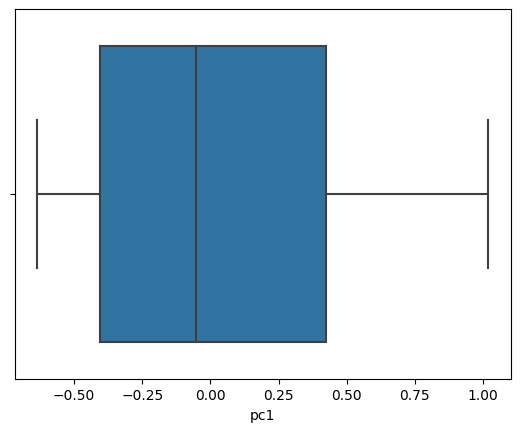

In [78]:
sns.boxplot(final.pc1)

<AxesSubplot: xlabel='pc2'>

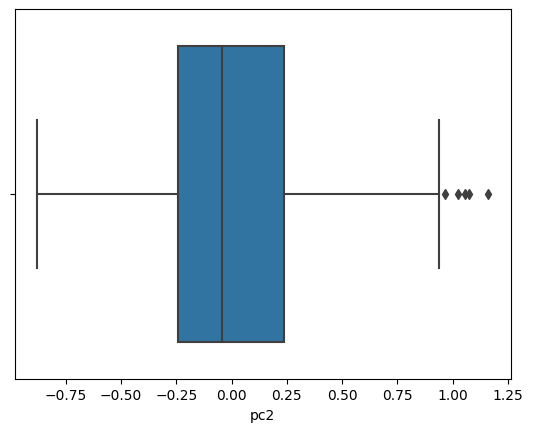

In [79]:
sns.boxplot(final.pc2)

In [80]:
from feature_engine.outliers import Winsorizer

In [81]:
winsor = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['pc2'])
final['pc2'] = winsor.fit_transform(final[['pc2']])

<AxesSubplot: xlabel='pc2'>

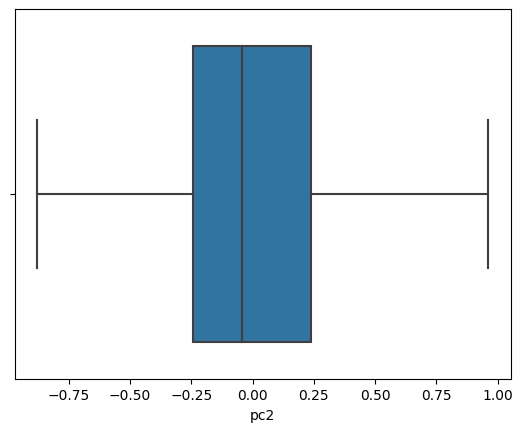

In [82]:
sns.boxplot(final.pc2)

In [83]:
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.cluster.hierarchy import dendrogram,linkage

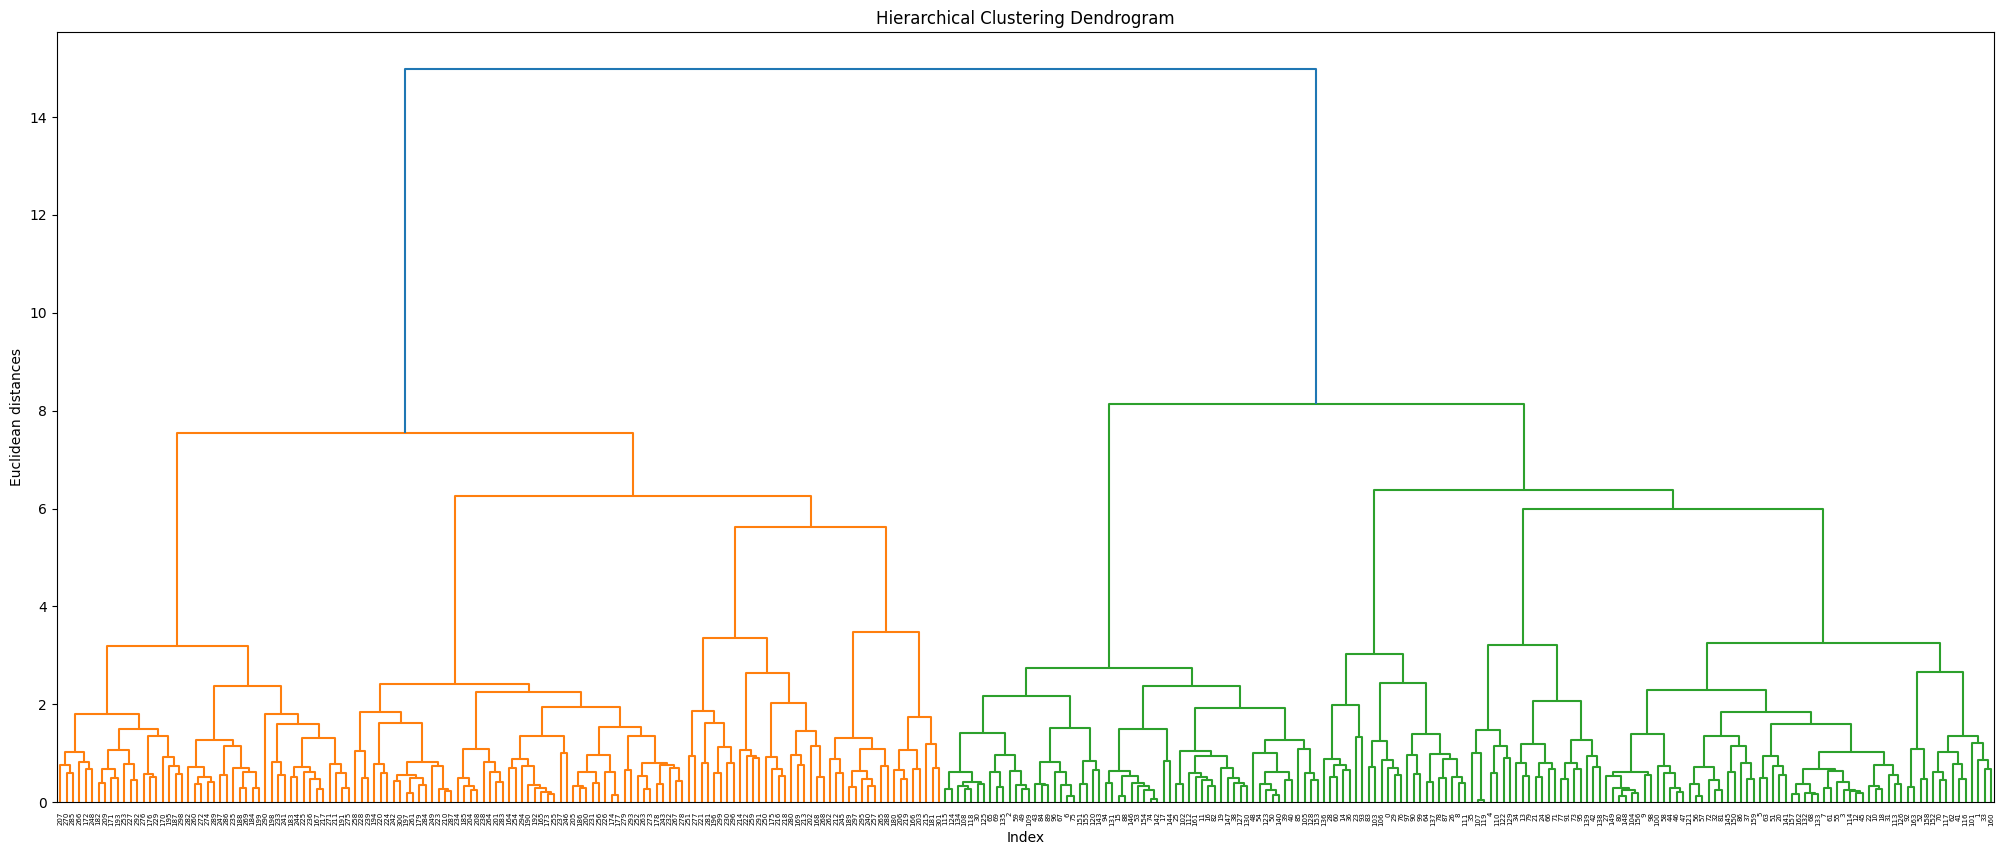

In [84]:
plt.figure(1, figsize = (25, 10))
tree_plot = dendrogram(linkage(df_norm, method  = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [85]:
#kmeans
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[292.494788504465,
 250.60374514594696,
 213.51247892817238,
 197.8342713182663,
 182.60397649142791,
 168.89625838808644,
 160.50244002062374]

Text(0, 0.5, 'total_within_SS')

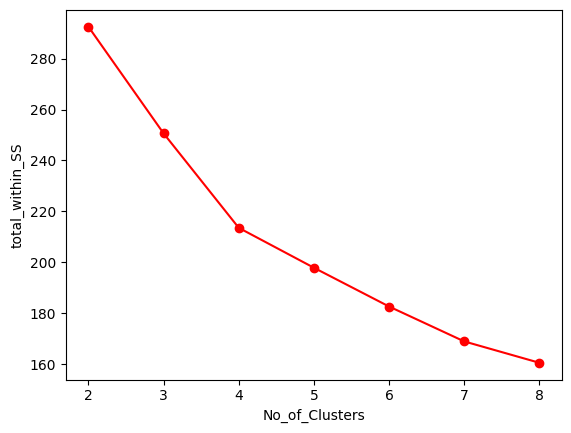

In [86]:
#scree plot
plt.plot(k,TWSS,'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")

In [88]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(df)

KMeans(n_clusters=3)

In [89]:
model.labels_     # getting the labels of clusters assigned to each row 

array([0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2,
       1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [91]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [92]:
final['clust'] = mb # creating a  new column and assigning it to new column 

In [93]:
final = final.iloc[:,[3,0,1,2]]
final.head()

,clust,pc0,pc1,pc2
0,0,-0.429138,-0.468747,0.773667
1,0,-0.399186,-0.392879,-0.040837
2,1,-0.801456,0.437916,-0.078059
3,0,-0.531849,-0.442848,-0.310874
4,2,-0.206903,0.863324,-0.672907


In [99]:
final = pd.concat([df.target, final.iloc[:, 0:4]], axis = 1)

In [100]:
final['target'].replace({1:0 , 0:1} , inplace=True)
final.head()

,target,target,clust,pc0,pc1
0,1.0,0.0,0.0,-0.429138,-0.468747
1,1.0,0.0,0.0,-0.399186,-0.392879
2,1.0,0.0,1.0,-0.801456,0.437916
3,1.0,0.0,0.0,-0.531849,-0.442848
4,1.0,0.0,2.0,-0.206903,0.863324
